### Ch 3 - Linear Regression

#### 3.0 Intro



- Many fancy statistical learning approaches are generalisations or extensions of linear regression

Questions that may be asked given data:
- Is there a relationship between any X and Y?
- How strong is this relationship?
- What X are associated with Y?
- How strong are these relationships?
- How accurately can we predict Y?
- Is the relationship linear?
- Is there synergy among Xs?

#### 3.1 Simple Linear Regression

Simple linear regression is very straightforward. It approximates a linear relationship. Given a predictor variable X and a quantitative response Y:
$$Y \approx \beta_0 + \beta_1 X$$
For example:
$$\text{sales} \approx \beta_0 + \beta_1 \times TV$$
Beta 0 and 1 are the model coefficients/parameters. $\hat{\beta_0}, \hat{\beta_1}$ are estimators generated from training data and are used to compute $\hat{y}$, the prediction of Y based on X = x in $\hat{y} = \hat{\beta_0}+\hat{\beta_1}x.$


Let there be n observation pairs, $(x_n, y_n)$. We want to find estimators 
$\hat{\beta_0}, \hat{\beta_1}$ such that the line $\hat{y} = \hat{\beta_0}+\hat{\beta_1}x$ is as close as possible to the data points. One of the ways of doing this is the least squares criterion:

Given $\hat{y} = \hat{\beta_0}+\hat{\beta_1}x$, let $e_i = y_i - \hat{y_i}$, representing the ith residual (difference between the ith observed response, $\hat{y_i}$ and $y_i$). The residual sum of squares, RSS, is defined as follows. The following are all equivalent:

$$\text{RSS}=e_1^2 + e_2^2+\dots+e^2_n$$
$$=\sum_{i=1}^{n}e_i^2$$
$$=\sum_{i=1}^{n}(y_i-\hat{\beta_0}-\hat{\beta_1}x_n)^2$$

To minimise, use partial derivatives $\frac{\partial S}{\partial \beta_0}$ and $\frac{\partial S}{\partial \beta_1}$, set equal to 0. After some calculations, you reach:
$$\hat{\beta_1}=\frac{\sum^{n}_{i=1}(x_i-\bar{x})(y_i-\bar{y})}{\sum^{n}_{i=1}(x_i-\bar{x})^2}$$

$$\hat{\beta}_0=\bar{y}-\hat{\beta_1}\hat{x}$$

Note that the formula for $\hat{\beta}_1$ is equal to $\frac{\sum^{n}_{i=1}x_iy_i-n\bar{x}\bar{y}}{\sum^{n}_{i=1}x_i^2-n\bar{x}^2}$ (obtained when solving pde, xbar and ybar are the sample means, eg. ybar is 1/n * sum(y_i))

The true relationship between X and Y is $Y=f(X)+\epsilon$ where $\epsilon$ is a catch-all, mean-zero, independent, random error term such that if we approximate a linear relationship, we would get $Y = \beta_0 + \beta_1X+ \epsilon$.

**See Figure 3.3:**
- Population regression line is the best linear approximation to true relationship between X and Y (unobserved in real life)
- Least squares line is characterised by the least squares regression coefficient estimates

**The difference between the lines arises due to sampling from a large population.**
- Suppose we want the unknown population mean $\mu$ of $Y$.
- We have access to n observations from $Y, (y_0,\ldots,y_n)$ 
- A reasonable estimate for the population mean $\mu$ is the sample mean $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_i$
- Similarly, the unknown beta coefficients are estimated by the hat beta coefficients.

**Bias**
- Using the sample mean to estimate the population mean is unbiased as on average (large number of estimates) we would expect them to equal exactly. 
- This property (being unbiased) holds true for least squares coeffcient too.

**How accurate is the sample mean as an estimate of the population mean?**
- A single estimate may be a substantial over/underestimate.
- This is answered by the standard error (SE) of the sample mean:
$$\text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2=\frac{\sigma^2}{n}$$
- sigma is the standard deviation of each of yi of Y. The SE decreases as n increases.

**How accurate are the estimated beta coefficents?**
- $$\text{SE}(\hat{\beta_0})^2=\sigma^2\left[\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^n(x_i-\bar{x})^2}\right]$$
- $$\text{SE}(\hat{\beta_1})^2=\frac{\sigma^2}{\sum_{i=1}^n(x_i-\bar{x})^2}$$
- sigma^2 is the variance of epsilon (error) here
- Assumptions:
  - The errors have a common variance (homoskedascticity)
  - No autocorrelation

- Notes:
    - Formula for SE of hat beta 1 is smaller when x_is are more spread out since the slope can be estimated better then
    - SE of hat beta 1 would be the same as SE of mean response hat mu when the mean of x (xbar) is 0. This also means hat beta 0, y-intercept, would equal to mean of y (ybar).
    - Sigma squared is not known but can be estimated from the data. The estimate for sigma is known as the residual standard error: $\text{RSE} = \sqrt{\text{RSS}/(n-2)}$.


**Confidence Intervals**
- SEs can be used to compute confidence intervals, with a 95% CI defined as the values where with 95% probability, the range will contain the true unknown value. 
- 95% of the intervals sampled will contain the true unknown value of the parameter.
- For linear regression, 95% CI for $\hat{\beta_1}$ approximately $\hat{\beta_1}\pm2\cdot\text{SE}(\hat{\beta_1})$

**Hypothesis testing**

SEs can be used to test null vs alternative hypotheses
-  $H_0:\text{There is no relationship between X and Y}, \beta_1 = 0$
-  $H_a:\text{There is some relationship between X and Y}, \beta_1 \neq 0$

- This is because when beta 1 is 0, the model reduces to Y = beta 0 + epsilon such that X is independent of Y.
- To test H0, we need to check if our estimate $\hat{\beta_0}$ is sufficiently far from 0. This is dependent on SE.
- In practice, a t-statistic is computed: 
$$t = \frac{\hat{\beta_1}}{\text{SE}(\hat{\beta_1})}$$
- The t-statistic measures the number of standard deviations, sigma, hat beta 1 is away from 0. 
  - No relationship between X and Y will have a t-distribution with n-2 degrees of freedom.
  - For samples > 30, the t-distribution approximates the standard normal distribution.
  - The probability of observing results equal or greater than $|t|$ is referred to the p-value
    - Small p-valies = unlikely to observe substantial associations between predictor and response due to chance, in absence of association between X and Y
    - ie. Small p-values reject H0
    - Typical cutoffs are 5% and 1%.

**Testing the accuracies of our model**
- The quality of the linear regression fit can be assessed using *residual standard error*, RSE, and the R^2 statistic.

RSE:
$$\text{RSE} = \sqrt{\frac{1}{n-2}\text{RSS}}$$
- Note that RSS = residual sum of squares, the sum of the squares of the residuals when you subtract the actual and predicted response values by the model: $\text{RSS} = \sum_{i=1}^{n}(y_i-\hat{y_i})^2$ 
- RSE tells us how much on average the model deviates from the true value even if the model was the perfect one.
- If $\hat{y} \approx y_i$ for all i then the model fits very well.

R^2 Statistic:
- RSE is measured in units of Y so its not always clear what a good RSE is. The R^2 statistic is an alternative - a proportion of variance independent of Y:
$$R^2=\frac{\text{TSS}-\text{RSS}}{\text{TSS}}$$
- Note that TSS = total sum of squares, the sum of the squares of the differences between the actual values and the mean of predicted values, ybar: $\text{TSS} = \sum_{i=1}^{n}(y_i-\bar{y})^2$ 
- TSS is the total variance in Y. RSS measures the variability unexplained after performing the regression. So, TSS - RSS is the explained regression. 
  - R^2 close to 1 means that most variability is explained by regression.
  - R^2 close to 0 can occur if the linear model is wrong, or error variance (sigma squared) is high, or both.

Correlation:
$$\text{Cor}(X,Y) = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n({x_i-\bar{x}})^2} \sqrt{\sum_{i=1}^n({y_i-\bar{y}})^2}}$$
- This is another measure of the linear relationship of X and Y. r = Cor(X,Y) can be another metric to assess fit of linear model. It can be shown that the R^2 statistic is equal to r^2, the squared correlation.
- The concept of correlation does not extend automatically to multiple linear regression as correlation qualifies one pair of variables rather than many variables.

#### 3.2 Multiple Linear Regression

- In practice we have many predictors. One option is to run many seperate simple linear regressions. This is not the best way as it is unclear how to make a single prediction given three separate equations. Also, each regression equation would ignore the other equations. 
- An alternative is to extend the simple linear regression model to accomodate multiple predictors. If we have p distinct predictors, our equation becomes:
$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p + \epsilon$$
- Here, each $X_j$ represents the $j$th predictor and $\beta_j$ is the association between that predictor and the response. $\beta_j$ is the average effect of Y of a one unit increase on X when all other predictors are fixed.

**Estimating the Regression Coefficients**
- Once again the regression coefficients must be estimated, giving us the following for each y:
$$\hat{y} = \hat{\beta_0}+\sum_{j=1}^{p}\hat{\beta_j}x_j$$
- Again we use the same least squares approach. However, this time, we have hat y replaced with the larger multiple regression equation:
- 
$$\text{RSS}=\sum_{i=1}^n(y_i-\hat{y}_i)^2$$


$$\text{RSS} =\sum_{i=1}^n(y_i-\hat{\beta_0}-\sum_{j=1}^p\hat{\beta_j}x_{ij})^2 $$

- The values for which hat beta j minimises RSS are the coefficient estimates. These can be obtained from matrix algebra but are not included here.
- Differences arise (as demonstrated in table 3.4) between the multiple linear regression model and the many simple linear regression model. 
- In the example provided, there is a relatively high correlation between radio and newspaper in table 3.5. This is why in the many simple model, the t-statistic for radio is significant while independent of other predictors, but in the multiple linear model, it is no longer significant.
- Above can be used to show that correlation is not causation by confounding variable



**Important Questions for Multiple linear regression**
1. Is at least one of the predictors (X1 - Xp) useful in predictions?
2. Do all predictors explain Y, or is only a subset useful?
3. How well does the model fit the data?
4. Given predictor values, what response value should we predict and how accurate is our prediction?

**1. Is there a relationship between X and Y in the first place?**
- We use a hypothesis test to answer this:
$$H_0 : \beta_1=\beta_2=\dots=\beta_p=0$$
$$H_a : \text{at least one }\beta_j \text{is non-zero.}$$
- This can be performed by computing the F-statistic:
$$F = \frac{(\text{TSS}-\text{RSS}/p)}{\text{RSS}/(n-p-1)}$$ 
- TSS and RSS are the same as in linear regression. Assuming the linear model is true, the following holds:
- $\text{E}(\text{RSS}/(n-p-1))=\sigma^2$ (residual variance estimates true error variance)
- $\text{E}(\text{TSS}-\text{RSS}/p)=\sigma^2$ under H_0 (Explained variance is due to random variation under H_0)
- Hence, F-statistic near 1 is evidence for H_0. F > 1 (due to numerator over sigma squared) is evidence for H_a.
- How large does the F-statistic need to be before we reject H_0? This depends on the values n and p. 
  - When n is large, then an F statistic a little larger than 1 can provide evidence against H_0. 
  - When H_0 is true and the errors epsilon_i have a normal distribution, F-statistic follows an F-distribution. A p-value can then be caclulated from this. Based off this p-value, we can determine whether or not to reject H_0. 


Sometimes we are interested in if only a subset of q oefficients are zero:
$$H_0 : \beta_{p-q+1}=\beta_{p-q+2}=\dots=\beta_{p-q+q}=0$$
We let the RSS for this model be $\text{RSS}_0$. Therefore:
$$F = \frac{\text{RSS}_0-\text{RSS}/q}{\text{RSS}/(n-p-1)}$$
- Note: The F-statistic and relevant p-value for when a singular predictor is omitted in the F-statistic is the same as the t-statistic and p-value of the multiple linear regression. Hence, it reports the partial effect of that singular predictor when added (additional contribution it makes)

Why do we need to look at the overall F-statistic? It seems that if any one of the p-values is small, then at least one of the X is related to Y, right? This is incorrect especially if p is large:
- Consider p = 100 and H_0 is true. If we set the threshold of the p-value to 0.05, then by chance, 5% of the p-values would be seen as significant (type 1 errors).
- The F-statistic does not suffer from this problem by adjusting for the number of predictions such that if H_0 is true, there is still only a 5% chance of a type 1 error.

F-statistics work when p is relatively small and smaller compared to n. Sometimes, we have a large number of variables. If p > n then there are more coeffcients than observations and we cannot use the multiple linear regression model. Instead, we use higher dimensional methods such as forward selection.


**2. Which variables are important?**

The F-statistic is the first step when faced with multiple regression. If, by p-value, at least one of X relates to Y, we can ask which of X relate to Y. The task of determining which subset of Xs relates to Y is variable selection.

Ideally, to perform variable selection we can test several models with different subsets of Xs. We can then use metrics to compare these models:
- Mallow's C_p
- Akaike information criterion
- Bayesion information criterion (BIC)
- Adjusted R^2

Although for p predictors, we would need 2^p models to test which is impractical for large p. There are three approaches for this task:
- Forward selection (always usable)
  - Begin with null model (no Xs).
  - Fit p simple linear regressions and the model with lowest RSS to null model
  - Add another model for the lowest RSS in the two-variable method
  - Repeat until stopping rule
- Backward selection (not usable if p > n)
  - Begin will all variables 
  - Remove variable with largest p-value (least statistically significant)
  - Repeat until stopping rule
- Mixed selection
  - Mixture of forward/backward selection
  - Start with null model and repeatedly add best fitting predictor
  - As Xs increase, p-values for Xs can become larger. If at any point the p-value for a variable rises, that X is removed.
  - Repeat until all variables have low p-values and all variables outside would have a large p-value if added
 

**3. Model Fit**

Like simple regression, common measures of model fit are RSE and R^2. In simple regression, R^2 is $\text{Cor}(X,Y)^2$ while in multiple regression, $\text{Cor}(Y,\hat{Y})^2$, the square of the correlation between the response and the fitted model. The fitted linear model maximises this for all linear models.
- R^2 close to 1 = large portion of variance in response variable
  - Caveat: R^2 always increases when more Xs are added even if that X is non-significant as this decreases RSS in training data, so R^2 (which is based of training data) also increases. ie, a higher R^2 does not necessarily mean the model is better, it could be overfitting.
- RSEs can increase on addition of more Xs even if RSS decreases as RSE is defined as $\text{RSE} = \sqrt{\frac{1}{n-p-1}\text{RSS}}$.

Plotting the data can also be useful to identify where models over/underfit.

**4. Predictions**

After fitting the model, you can apply the formula to predict Y on a basis of all X. There are uncertainties associated with this:
1. The model's coefficients are only estimates for the true coefficients of the regression plane. This is related to the reducible error. We can compute a CI to find how close our model is to f(X)
2. Model bias by virtue of assuming that the actual relationship is linear.
3. There is random error epsilon in the model (irreducible rror). We use prediction intervals to find how much Y will vary from hat Y.

- A 95% CI tells you that 95% of intervals of that form will contain the true value of f(X) (a repeatable part, no random noise). 
- A 95% PI tells you that 95% of intervals of that form will contain the true value of Y (a one off, observed result with irreducible random noise).

#### 3.3 Considerations in the Regression Model

##### **Qualitative Predictors**


- In practice, some predictors are also qualitative

For predictors with two levels, we can create a dummy variable that takes into account two possible values (one-hot encoding)
$$x_i = \begin{cases} 1 & \text{case 1} \\ 0 & \text{case not 1}\end{cases}$$
Then use this in the regression equation:
$$y_i = \beta_0 + \beta_1x_i + \epsilon_i = \begin{cases} \beta_0 + \beta_1 + \epsilon & \text{case 1} \\ \beta_0 + \epsilon & \text{case not 1}\end{cases} $$
- Beta 0 is interpreted as the average y_i for case 2, while beta 0 + beta 1 is the average y_i for case 1. Beta 1 is the average difference between cases.
- The type of coding is arbitrary - the cases can be rewritten with +1 and -1 instead. The difference would then lie in the interpretation of the coefficients.

For predictors with more than two variables, we can set up more dummy variables: 

$$x_{i1} = \begin{cases} 1 & \text{case 1} \\ 0 & \text{case not 1}\end{cases}$$
$$x_{i2} = \begin{cases} 1 & \text{case 2} \\ 0 & \text{case not 2}\end{cases}$$

The final regression equation would then be:
$$y_{i} = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2}+ \epsilon_i\begin{cases} \beta_0 + \beta_1 +\epsilon_i & \text{case 1} \\ \beta_0 + \beta_2 +\epsilon_i & \text{case 2} \\ \beta_0 + \epsilon_i & \text{case 3}\end{cases}$$

In this way, you can integrate both qualitative and quantitative variables into a regression equation. There are different ways to code qualitative variables, desgined to measure particular contrasts, but this is beyond the scope of the book.

##### **Extensions of the Linear Model**

Important restrictions of the linear model are that it is additive and linear:
- Additivity assumes that association between one X and Y is independent from other Xs.
- Linearity assumes that the change in response in Y per one unit change in X is constant.

The following examines classical approaches for extending the linear model

*Removing the Additive Assumption*
- For example, increasing x1 may increase the slope term beta 2, a completely different variable. This is an interaction effect. One way to extend this to the model is to add an interaction term:
$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon$$
$$Y = \beta_0 + (\beta_1+\beta_3X_2)X_1 + \beta_2X_2 + \epsilon$$
$$Y = \beta_0 + \tilde{\beta_1}X_1 + \beta_2X_2 + \epsilon \hspace{1cm} (\tilde{\beta_1} = \beta_1 + \beta_3X_2)$$
- You can test if such a model is better again with a low p-value associated with $\beta_3$ such that evidence provided for $\beta_3 \neq 0$ 
- Sometimes the interaction term is significant when the main effects are not. The hierarichal principle states that if an interaction in a model is included, then the main effects should be included as well.
- These principles apply to qualitative variables as well:

No association term:
$$Y = \beta_1X_1 + \begin{cases}\beta_0 + \beta_2 & \text{case 1} \\ \beta_0 & \text{not case 1}\end{cases}$$
Association term ($\beta_3$ dummy variable added):
$$Y \approx \beta_0 + \beta_1X_1 + \begin{cases}\beta_2 + \beta_3X_1 & \text{case 1} \\ 0 & \text{not case 1}\end{cases}$$
$$Y = \begin{cases}(\beta_0 + \beta_2) + (\beta_1 + \beta_3)X_1 & \text{case 1} \\ \beta_0 + \beta_1X_1 & \text{not case 1}\end{cases}$$

*Non-linear relationships*
- We can extend relationships to polynomial regression.
- Note that while the following: 
$$Y = \beta_0 + \beta_1X_1 + \beta_2X_1^2 +\epsilon$$
-... uses a non-linear function of X_1, it is still a linear model in that it is still a multiple lienar regression model with X_2 = X_1^2.
- Why don't we just include X^3, X^4 ... X^n? Because of overfitting.
- The approach of extending this linear model is polynomial regression.

##### **Potential Problems**


The following are potential problems arising from fitting a linear regression onto a dataset:
1. Non-linearity
2. Correlation of error terms
3. Non-constant variance of error terms
4. Outliers
5. High-levarage points
6. Collinearity

*Non-linearity*
- Linear regression assumes straight-line relationships between X and Y. If the true relationship is not lienar, then the conclusions and predictions from the model are suspect.
- Residual plots plot residuals, $e_i = y_i - \hat{y}_i$ against $x_i$. With multiple predictors, you plot residuals against predicted values of $\hat{y}_i$. No pattern in the plot is ideal.
- If residual plots indicate non-linear associations in the data, then non-linear transformations can be used in the regression model.

*Correlation of Error Terms*
- The linear model assumes $\epsilon_1, \epsilon_2,\ldots,\epsilon_n$ are uncorrelated. If there was, then the estimated SEs would underestimate the true SEs, causing CIs and PIs to be narrower than they should be. This would also cause p-values to be lower than they should be.
- Correlations among error terms usually occur in time series data, with observations at adjacent time points having positively correlated errors. To test for correlation, residuals can be plotted. No pattern in the residual plot is ideal. Otherwise, tracking in the residuals may occur with adjacent residuals having similar values. See Fig 3.10.

*Non-constant Variance of Error Terms*
- The linear model assumes that the error terms have constant variance, $\text{Var}(\epsilon_i)=\sigma^2$. This assumption is the basis of SEs, CIs, and hypothesis tests. - Non-constant variances are called heteroscedasticity, and can be identified by a funnel shape in the residual plot.
- A possible solution is to transform Y with a concave function such as log or sqrt. This reduces the magnitude of the larger responses.
- The average of variances is defined with $\sigma_i^2 = \sigma^2/n_i$. To remedy homoskedasticity, you can assign weights inversely proportional to the variance to give greater weighting to observations with low variances.

*Outliers*
- These are defined as points for which $y_i$ is far from the predicted $\hat{y}_i$.
- Outliers can cause dramatic changes to model fitting metrics such as RSE and R^2 even if it has little effect on the model fit.
- Residual plots can be used to identify outliers again. In practice, it might be difficult to classify which points are residuals. In this case, studentised residuals can be computed by dividing each residual by estimated SE.

*High leverage Points*
- These are defined as points which have an unusual value for $x_i$. These points can have a more dramatic effect on the impact of the least squares line compared to outliers.
- This problem is more pronounced in multiple regression with more than two predictors as these points can be in the range of individual predictors but are unusual in the full set of predictors.
- The leverage statistic can be used to identify observations with high leverage:
$$h_i = \frac{1}{n}+\frac{(x_i-\bar{x})^2}{\sum_{i'=1}{n}(x_{i'}-\bar{x})^2}$$
- In the equation above, h_i increases with distance of x_i from xbar. It is noted that 1/n < h_i < 1, and the average levarage for all observations is (p+1)/n. Higher statistics, especially those exceeding (p+1)/n, may be high leverage points.

*Collinearity*
- When two or more predictor variables are closely related to each other. 
- This is a problem as it can be difficult to separate the individual effects of the collinear variables. 
- Contour plots can be made between two coefficents, with each ellipse representing the different combination of coefficients that result with the same RSS. Ellipses nearest to the center take on the lowest values for RSS. 
- For collinear coefficients, contour plots will be narrow (See Fig 3.15), with a broad range of values for the same RSSs.
- Collinearity reduces the accuracy of estimates of the regression coefficients, so SE for the coefficients increases. This then causes a decrease in the t-statistic. So, in the presence of collienarity, we may fail to reject H_0 (ie. power of the test reduces).
- Looking at the correlation matrix can help detect collinearity. 
- Collinearity may exist between several variables, termed multicollinearity. To assess this, we can compute the variance inflation factor (VIF), the ratio of the variance of $\hat{\beta_j}$ when fitting the full model divided by the variance of $\hat{\beta_j}$ on its own.
  - VIF = 1 means absence of collienarity.
  - Typically, VIFs > 5 or > 10 indicates a lot of collinearity.
  - $$\text{VIF}(\beta_j)=\frac{1}{1-R^2_{X_j|X-k}}$$
  - ... where $R^2_{X_j|X-k}$ is the R^2 froma regression of X_j onto all other variables. 
  - Intuitively, if R^2 is small, then X_j is mostly independent and VIF is close to 1.
- Solutions to collinearity include dropping one of the problematic variables or combining the collinear variables into a single predictor. 

#### 3.4 The Marketing Plan

In ISLP, the chapter uses the example of Advertising data to illustrate linear regression. The following are questions which can now be answered from that:

**1. Is there a relationship between sales and advertising?**
- Fit a multiple linear regression model of sales onto the three predictors. 
- The F-statistic has a low p-value suggesting association.

**2. How strong is the relationship?**
- There are several metrics for model accuracy. For example: RSE and R^2. From them, Xs explain almost 90% of the variance in sales. 

**3. Which media are associated with sales?**
- We can take the p-value of each t-statistic for individual contributions to multiple linear regression. 
- TV and radio have low p-values, but not newspaper.

**4. How large is the association between each medium and sales**
- The SE of the computed coefficients can help construct CIs for the actual coefficient.
- TV and radio have narrow CIs far from zero, while the CI for newspaper includes zero, so the variable is not statistically significant.
- Could collinearity be a reason for the wide SEs? The VIFs for the Xs are all less than 1.2, suggesting no collinearity.
- For association of each medium individually, three separate linear regressions can be performed.
  
**5. How accurately can we predict future sales?**
- The accuracy for this estimate depends on if we are predicting a single response ($Y = f(X) +\epsilon$), or the average response, $f(X)$. 
- The former uses a PI, while the latter uses a CI. PIs are wider than CIs as the account for irreducible error, $\epsilon$

**6. Is the relationship linear?**
- Plot residuals to test linearity. 

**7. Is there synergy among the advertising media?**
- Compare the models after adding an interaction term to accomodate non-addivite relationships. Small p-values with this interation suggests presence of relationships.
- Then, check using measures of model accuracy (RSE/R^2)

#### 3.5 Comparison of Linear Regression with KNN

- Linear regression is parametric since it assumes f(X) is linear. These types are advantageous as they are easy to fit, only require estimate of a small number of coefficients. A disadvantage though is the several assumptions required. If the actual relationship is not linear, then the parametric method will be poor.
- Non-parametric models do not assume a parametric form of f(X). KNN regression is one of the simplest non parametric methods.

KNN
- Given a value for K and a prediction point $x_0$, KNN identifies the K closest training observations to $x_0$, represented by $\mathcal{N_0}$. It then estimates $f(x_0)$ using the average of $\mathcal{N_0}:$
$$\hat{f}(x_0) = \frac{1}{K}\sum_{x_i \in \mathcal{N_0}}y_i$$
- KNNs manifest as a step function, but higher Ks smoothen the step function out. The optimal value of K relies on the bias-variance tradeoff - small Ks will be more flexible (low bias, high variance). Higher Ks are less flexible, with high biases and low fvariances.
- The parametric approach outperforms the non-parametric approach if the parametric form is close to the true form of the function. 
- In terms of MSE, KNN performs only a little worse than OLS regression if K is large, and much worse when K is small (assuming the actual relationship is close to the chosen parametric form)
- In real life, one might think that KNN should be favoured over OLS as it will be at worst slightly inferior to linear regression, but in reality, even when the true relationship is highly non-linear, KNN is still inferior to OLS especially with p > 1.
- An increase in dimension is associated with only small changes in OLS MSE (compared to KNN, for a non-linear relationship in this case) since higher dimensions have an effective reduction in sample size. The curse of dimensionality is when, in KNN, the K nearest observations to x_0 are very far away from x_0 in p-dimensional space when p is large, causing a poor KNN fit. Even at small dimensions, OLS may be preferred over KNN for interpretability. 

#### 3.6 Lab: Linear Regression

In [19]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

# New imports!
# PS: scipy version is 1.15.3
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

In [ ]:
dir(np.array([3]))

##### Simple Linear Regression

In [ ]:
# End Goal: Regression model to predict median house value (medv) 
# using 13 predictors such as rmvar, age, lstat.

Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [5]:
# we have our intercept, beta 0, and lstat, beta 1
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), 'lstat': Boston['lstat']})
print(X[:4])
y = Boston['medv'] # our response
model = sm.OLS(y, X) # sm.OLS specifies the model
results = model.fit() # model.fit does the actual fitting

# print(results.summary()) # provides a complete summary of all the stats
print(summarize(results)) # a specialised ISLP function for some of the stats relevant to OLS

   intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94
              coef  std err       t  P>|t|
intercept  34.5538    0.563  61.415    0.0
lstat      -0.9500    0.039 -24.528    0.0


In [ ]:
# Above we showed that assigning one predictor is easy,
# but what if we wanted to transform our predictors (Eg.
# expand into sets of variables). A transform (from sklearn)
# is an object with two main methods - fit() and transform()

# ModelSpec from ISLP creates a transform object, and then
# transform() and fit() construct the model matrix.

design = MS(['lstat']) # transform created by this expression
design = design.fit(Boston) # fit() may do initial computations eg. compute means, sds for centering
X = design.transform(Boston) # transform() applies the fitted transform to the data for the model matrix
X[:4] # fit() does very little here - only checks that lstat is in Boston
# fit_transform() combines these methods.

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [7]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [ ]:
# get_prediction() can be used to obtain predictions and make PIs and CIs

new_df = pd.DataFrame({'lstat':[5, 10, 15]}) # values for which to make predictions
newX = design.transform(new_df) # transform() method of design creates corresponding model matrix
new_predictions = results.get_prediction(newX);

print("predictions: ", new_predictions.predicted_mean)
print("CIs: ", new_predictions.conf_int(alpha=0.05))
print("PIs: ", new_predictions.conf_int(obs=True, alpha=0.05)) # wider, but both center around the same point

predictions:  [29.80359411 25.05334734 20.30310057]
CIs:  [[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]
PIs:  [[17.56567478 42.04151344]
 [12.82762635 37.27906833]
 [ 8.0777421  32.52845905]]


C:\Users\abull\AppData\Local\Temp\ipykernel_28092\3075161036.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\abull\AppData\Local\Temp\ipykernel_28092\3075161036.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


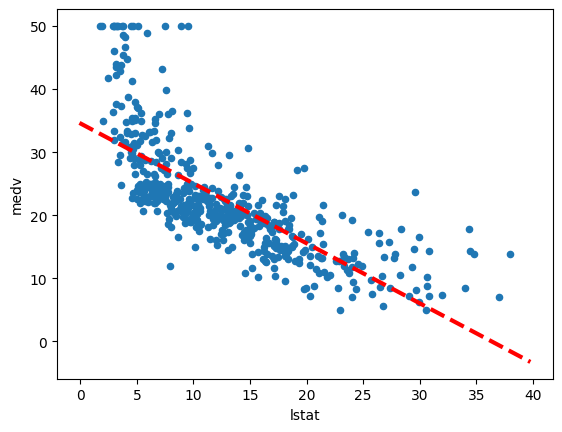

In [ ]:
# Goal: plotting a regression line to an existing plot

# *args = non-named args to abline()
# **kwargs = any number of named arguments
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim() # gets smallest and largest x-value
    ylim = [m * xlim[0] + b, m*xlim[1] + b] # works out the range of y-values
    ax.plot(xlim, ylim, *args, **kwargs)

ax = Boston.plot.scatter('lstat', 'medv') 
# changing ^ does not change the red line as
# abline() is taking directly from results:
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)
# abline() is a rewrite of an existing function, ax.axline()


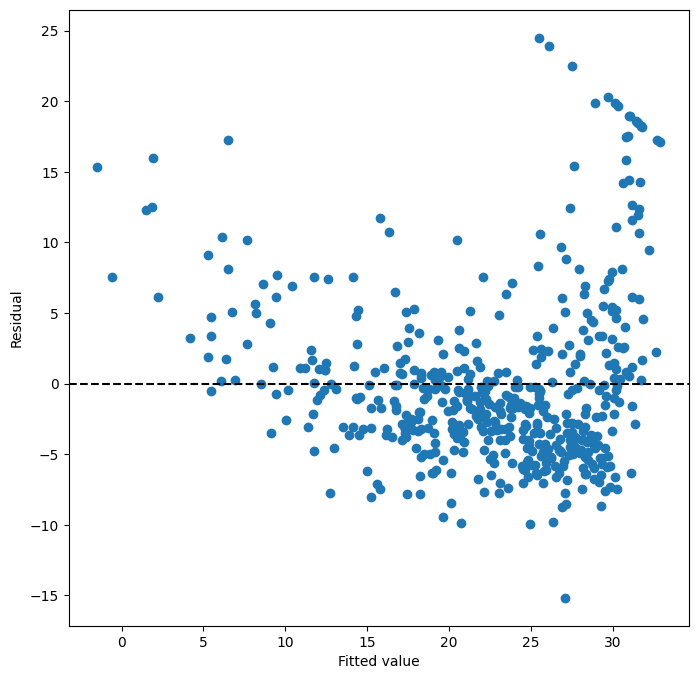

In [ ]:
# Goal: plot residuals

ax = subplots(figsize=(8,8))[1] # only taking ax, not fig
ax.scatter(results.fittedvalues, results.resid)
# results object has these properties ^
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--'); # horizontal line added at y=0, c=k (black), and dashed (--)
# On the basis of the plot below, there is evidence of non-linearity.

np.int64(374)

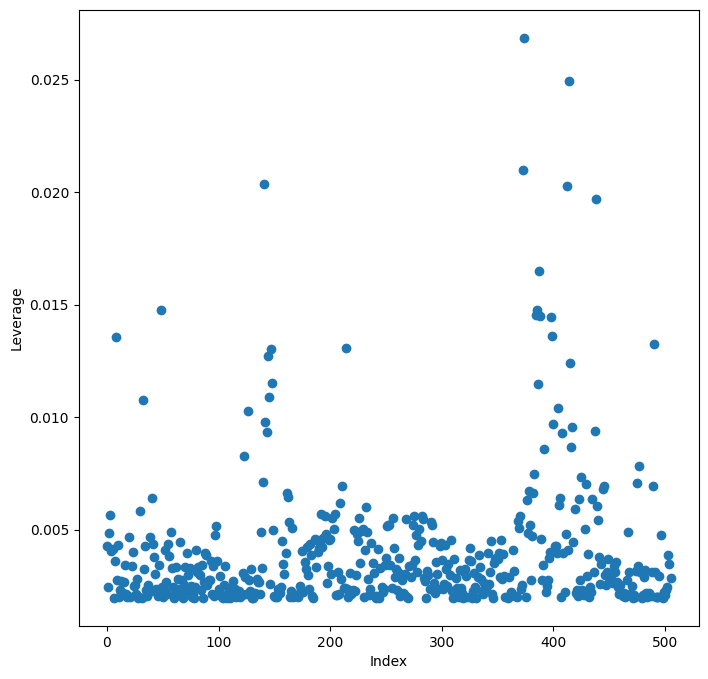

In [ ]:
# Goal: obtain leverage statistics

infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
# np.arange(X.shape[0]) = array of [0, 1, ..., n-1]
# infl.hat_matrix_diag = leverage values aka diagonal eleents of Hat matrix
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag) # finds point of maximum leverage

##### Multiple Linear Regression

In [21]:
# We're putting in the column names lstat, age into MS
X = MS(['lstat', 'age']).fit_transform(Boston)
y = Boston['medv']
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [ ]:
# We can use the following short hand to perform regression using all predictors:

terms = Boston.columns.drop('medv') # can replace with eg. ['medv', 'age']
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


##### Multivariate Goodness of Fit

In [ ]:
print(results.rsquared) # R^2
print(np.sqrt(results.scale)) # RSE
# We use VIF to assess collinearity

0.7343070437613076
4.798034335596367


In [ ]:
vals = [VIF(X, i) # Two vars: df/array and variable column index
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif': vals},
                   index = X.columns[1:])
vif # vifs are not majorly interesting, with tax being the highest at 9.

13

##### Interaction Terms

In [46]:
# Using ModelSpec, we can include a tuple with the interacting terms:

X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


##### Non-linear Transforms of Predictors

In [ ]:
X = MS([poly('lstat', degree = 2), 'age']).fit_transform(Boston)
# poly in ISLP specifies the columns representing polynomial functions
# the effectively zero p-value term of the 2nd degree suggests improvement
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)
poly('lstat', degree= 2, raw=True)
# poly() makes a basis matrix  whose columns are orthogonal polynomials for stable OLS computations (reduces collinearity)
# if we included raw=True into poly(), the basis matrix would only be lstat and lstat**2
# Since the bases both represent quadratic polynomials, only the polynomial coefficents change and not the fitted values
# By default, columns from poly() do not include an intercept (added by MS())


Feature(variables=('lstat',), name='poly(lstat, degree=2, raw=True)', encoder=Poly(degree=2, raw=True), use_transform=True, pure_columns=False, override_encoder_colnames=True)

In [55]:
# results1 is from the standard multiple regression
# results3 is with the polynomial term
anova_lm(results1, results3)
# anova_lm() performs a hypothesis test to compare the variables.
# H0 = quadratic term is not needed
# Ha = bigger model is superior

# F-stat = square of t statistic for quadratic term in results3
# ... as the nested models differ by one degree of freedom
# F-stat = 177.28 with a p-value of 0, giving evidence of improvement

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


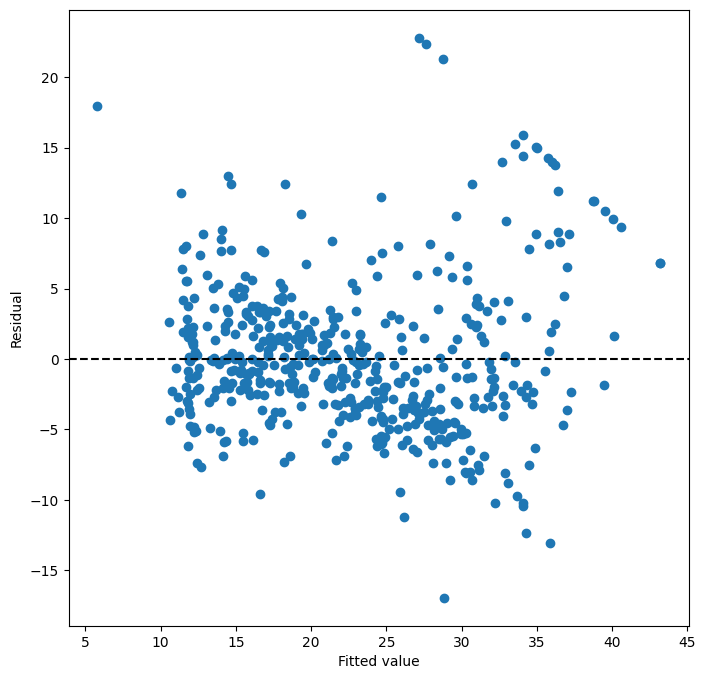

In [58]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls="--");
# Litle discernible pattern in residuals indicates improvement

##### Qualitative Predictors

In [ ]:
Carseats = load_data('Carseats')
Carseats.columns
# Contains qualitative data like ShelveLoc
# MS() generates dummy variables automatically with one-hot encoding
# ShelveLoc has three values: Bad, Medium, and Good
# If we make a dummy variable for each of these, one of the columns would be redundant
# Having all three dummies + intercept would result in an unsolvable equation due to multicollinearity

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [66]:
# Goal: predict sales

allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'), ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


#### 3.7 Conceptual Exercises

answers taken from: https://botlnec.github.io/islp/

##### Conceptual Section

**1.**

H0 TV: In the presence of radio and newspaper, there is no association between TV and the response

H0 radio/newspaper copy the format above.

H0 intercept: In the absence of all of TV, radio, and newspaper, there is no association between the intercept and response. // Sales are zero

//

*Answers*

Mathematically: $H_0: \beta_i = 0 \hspace{0.5cm} (i = 0, 1, 2, 3)$ and $H_a: \beta_i \neq 0 \hspace{0.5cm} (i = 0, 1, 2, 3)$

We conclude there is a relationship between TV and sales, and between radio and sales.

**2.**

The KNN classifier is a classification method in which the output is categorical, while the KNN regression method is a prediction method in which the output is numerical.  

**3.**

a) iv) Fixed value of IQ and GPA causes college grads to earn more on average (beta 3 > 0) only if GPA is high enough (beta 5 < 0) 
b) Salary = 50 + (20 * 4) + (0.07 * 110) + 35 + (0.01 * 4 * 110) + (-10 * 4 * 1) = 137.1
c) True, as a small coefficient suggests a low effect in the salary when these two are considered together.

// 

*Answers:*

a) The difference between the types of education would be given by:
$$Y_{college} - Y_{highschool} = 35 X_3 - 10 X_5$$
So as above, provided that GPA (X_5) is high enough (above 3.5), high school graduates would earn more than college grads

c) False. Even with a small coefficient, we must perform a statistical test to provide evidence for interaction such as t-statistic of F-statistic.


**4.**

a) RSS for cubic regression would be lower due to overfitting.

b) We would expect the RSS for them to be the same as the optimal beta 2 and beta 3 for the cubic regression would optimise to 0. 

c) Since it is not linear, we cannot predict the RSS from the training data.

d) RSS for cubic would be lower as it would outperform the linear regression.

// 

*Answers*

a) For a linear model, cubic regression would have a lower RSS as it is more flexible

b) For a linear model, linear regression would have a lower RSS as it is a better fit for the true value of the data

c) For a non-linear model of unknown specification, cubic regression will have a lower RSS (same reason as a)

d) For a non-linear model of unknown specification, we cannot tell which RSS would be lower due to its flexibility. 
- If slightly non linear:
  - Linear regression will have low bias and variance
  - Cubic regression will have low bias and high variance
  - Linear may beat cubic
- If substantially non linear:
  - Linear regression will have high bias and low variance
  - Cubic regression will have low bias and high variance?
  - Cubic beats without overfitting.
- Overall depends on bias-variance tradeoff

**5.**

*Answer*

$$\hat{y}_i = \frac{x_i}{\sum_{k=1}^{n} x_k^2} \sum_{j=1}^{n} x_j y_j$$

$$\hat{y}_i = \sum_{j=1}^{n} \left( \frac{x_i x_j}{\sum_{k=1}^{n} x_k^2} \right) y_j$$

$$a_{i'} = \frac{x_i x_{i'}}{\sum_{k=1}^{n} x_k^2}$$


**6.**
$$y_i = \beta_0 + \beta_1x_i \tag{1}$$
$$\text{Let k:}$$
$$k = \beta_0 + \beta_1\frac{\sum_{i=1}^{n}x_i}{n}$$
$$\text{From (1):}$$
$$k = \beta_0 + \beta_1\frac{\sum_{i=1}^{n}\frac{y_i - \beta_0}{\beta_1}}{n}$$
$$k = \beta_0 + \beta_1\frac{\sum_{i=1}^{n}{y_i} - n\beta_0}{\beta_1n}$$
$$k = \beta_0 + \frac{\sum_{i=1}^{n}{y_i}}{n}-\frac{n\beta_0}{n}$$
$$\therefore k = \bar{y}$$
$$\text{When }x_i = \bar{x}, y_i = \bar{y}$$

**7.**

The proof of R^2 = Cor^2 is long. Essentially, given that R^2 = 1 - RSS/TSS, we simplify to remove hat-y and express R^2 in terms of beta 1, which we then substitute for our minimum of beta 1 to give Cor^2.

*Answer*

Actually, I forgot to read that the question says to assume xbar = ybar = 0 which heavily reduces the amount of work to be done. The principle of substituting beta 1 stays the same though.

#### 3.7 Applied Exercises

##### 8.

In [67]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

In [124]:
# 8.

# a)
Auto = pd.read_csv("data/Auto.csv", na_values=["?"])
Auto = Auto.dropna() # needed to do this since there were nan values
y = Auto['mpg']
X = MS(['horsepower']).fit_transform(Auto)
#X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]), 'horsepower':Auto['horsepower']})
#print(np.asarray(Auto['horsepower'], dtype=float))
model = sm.OLS(y, X) 
results = model.fit()
print("\ni) ",summarize(results))
# i) There is a relationship since p-value < 0.05

print("\nii)\nR^2: ", results.rsquared, "\nRSE: ", np.sqrt(results.scale)) # RSE
# ii) The relationship is relatively strong. 60% of the variance is explained by the model. 

# iii) The coefficient for horsepower is negative so the relationship between X and Y is negative

print("\niv)\nX = 98, Y = ", results.params.iloc[0] + 98 * results.params.iloc[1]);
# long: 
new_df = pd.DataFrame({'horsepower':[98]})
newX = MS(['horsepower']).fit(Auto).transform(new_df)
new_predictions = results.get_prediction(newX)
print(new_predictions.predicted_mean)
print("CIs: ", new_predictions.conf_int(alpha = 0.05))
print("PIs: ", new_predictions.conf_int(obs = True, alpha = 0.05));
# iv) See above.



i)                 coef  std err       t  P>|t|
intercept   39.9359    0.717  55.660    0.0
horsepower  -0.1578    0.006 -24.489    0.0

ii)
R^2:  0.6059482578894348 
RSE:  4.90575691954594

iv)
X = 98, Y =  24.467077152512427
[24.46707715]
CIs:  [[23.97307896 24.96107534]]
PIs:  [[14.80939607 34.12475823]]


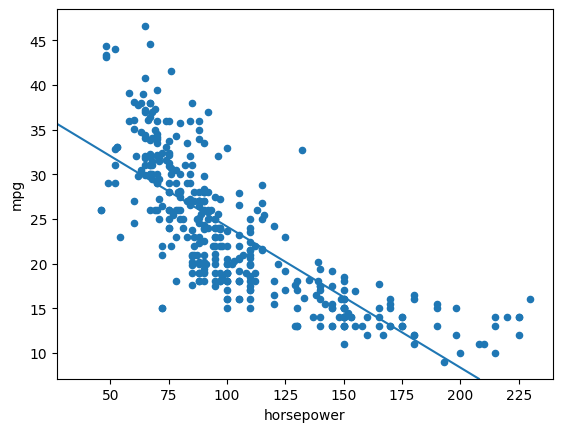

In [125]:
# 8 b)
ax = Auto.plot.scatter('horsepower', 'mpg')
ax.axline((ax.get_xlim()[0], results.params.iloc[1] * ax.get_xlim()[0] + results.params.iloc[0]), slope = results.params.iloc[1]);
# Note: ax.axline() takes in xy1 (a first point) and xy2 (a second point) OR slope. 
# Above, I used the smallest value of x via get_xlim()[0], and worked out the (x, y) tuple. Slope is just results.params[1]

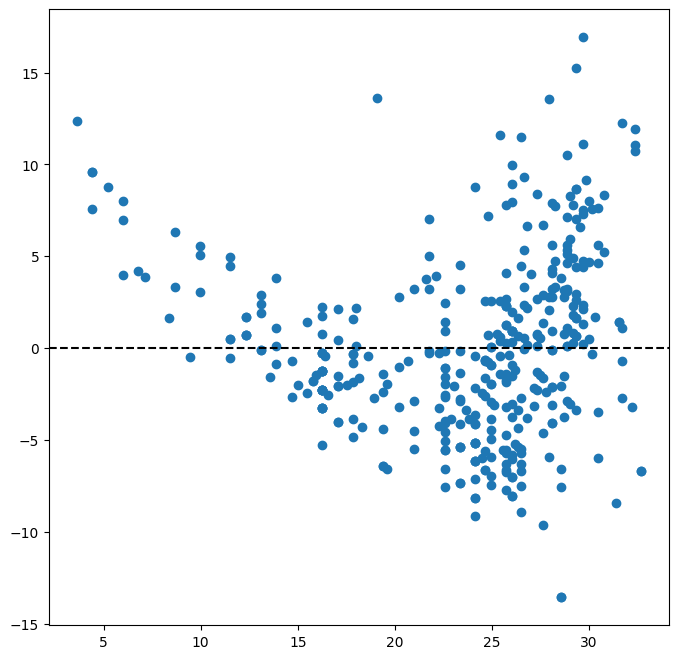

In [ ]:
# 8 c) We find residuals and leverage statistics:
fig, ax = subplots(figsize=(8,8))
ax.scatter(results.fittedvalues, results.resid)
ax.axhline(0, c='k', ls='--');
# Residuals show signs of a pattern suggesting non-linearity

np.int64(115)

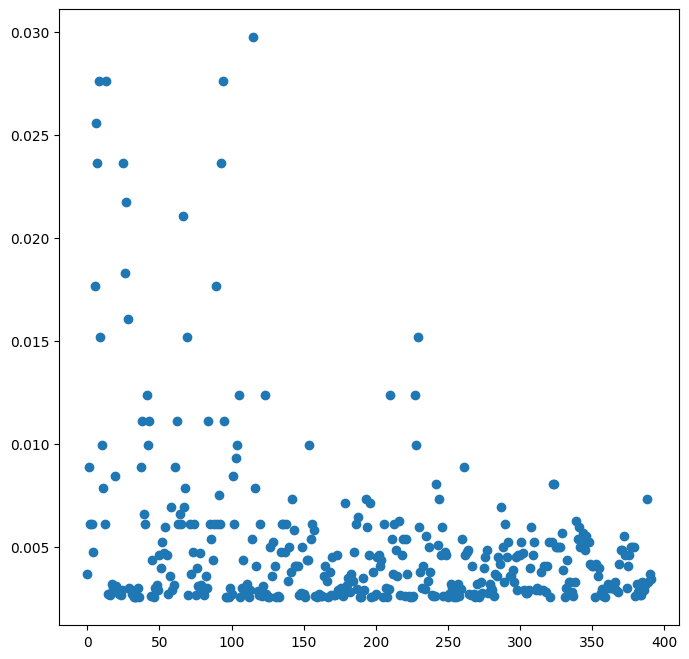

In [ ]:
# 8 c) cont.

infl = results.get_influence()
ax = subplots(figsize = (8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
np.argmax(infl.hat_matrix_diag)
# There is some evidence of high leverage points from below.

##### 9.

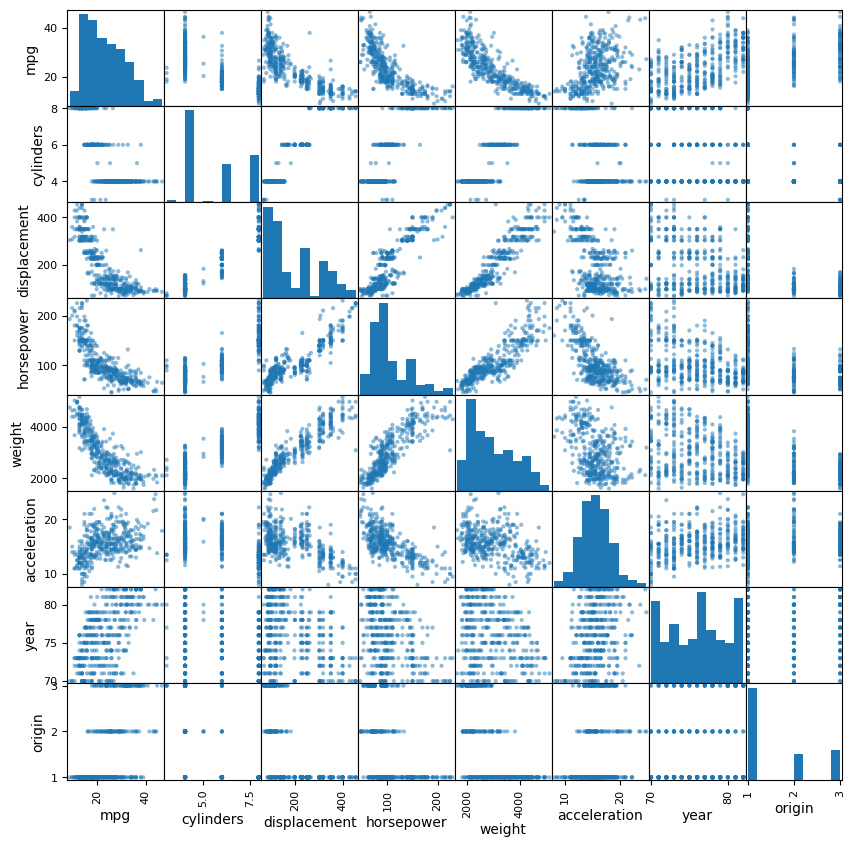

In [161]:
# 9. a)

Auto = pd.read_csv("data/Auto.csv", na_values=["?", "nan"])
Auto = Auto.dropna()
pd.plotting.scatter_matrix(Auto[Auto.columns], figsize=(10,10));



In [169]:
# 9. b) 

numOnly = Auto[Auto.columns.drop('name')]
print(numOnly.corr())

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

In [ ]:
# 9. c)

# i)
predictors = Auto[Auto.columns.drop(['name', 'mpg'])]
y = Auto['mpg']
X = MS(predictors).fit_transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
# F-statistic is 252.4 suggesting significance

# ii) 
# displacement, weight, year, and origin appear statistically significant

# iii)
# Coefficient suggests that for every increase in year, mpg increases by 0.7508


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          2.04e-139
Time:                        22:57:59   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707   

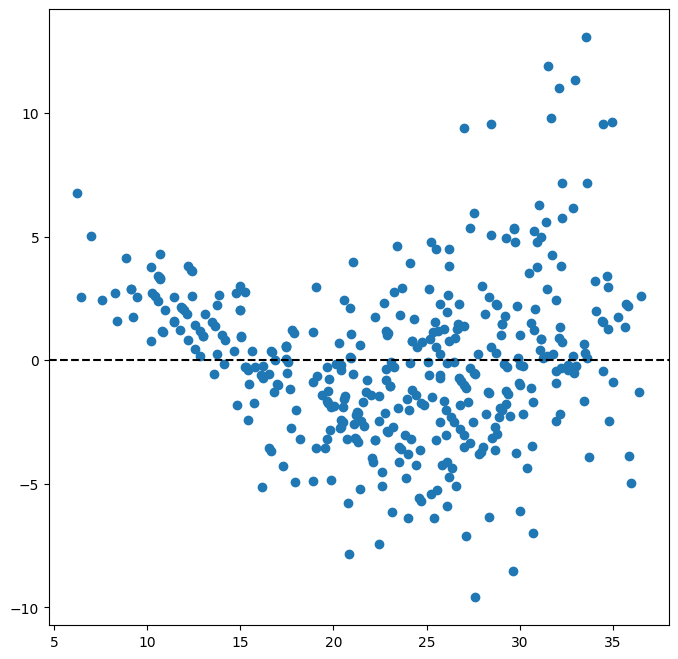

In [ ]:
# 9. d)

fig, ax = subplots(figsize=(8,8))
ax.scatter(results.fittedvalues, results.resid)
ax.axhline(0, c='k', ls='--');
# residuals suggestive of non-linearity

np.int64(13)

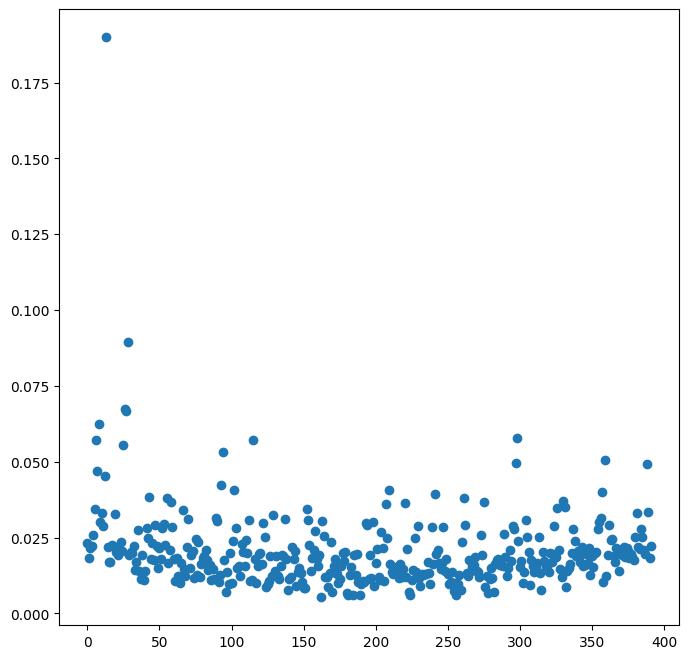

In [ ]:
# 9. d) cont. 

infl = results.get_influence()
fig, ax = subplots(figsize = (8,8))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
np.argmax(infl.hat_matrix_diag)
# There is one noticeable high-leverage point at 13

In [ ]:
# 9. e)
print("For all variables:")
print("\nR^2: ", results.rsquared, "\nRSE: ", np.sqrt(results.scale))

y = Auto['mpg']
X = MS(['displacement',
        'weight',
        'year',
        'origin']).fit_transform(Auto)
model2 = sm.OLS(y, X)
results2 = model2.fit()

print("\n\nFor sig variables:")
print(summarize(results2))
print("\nR^2: ", results2.rsquared, "\nRSE: ", np.sqrt(results2.scale)) 

y = Auto['mpg']
X = MS(['displacement',
        'weight',
        'year',
        'origin',
        ('displacement', 'weight')]).fit_transform(Auto)
model3 = sm.OLS(y, X)
results3 = model3.fit()
print("\n\n displacement:weight interaction:") # (on basis of apparent correlation in scatter matrix)
print(summarize(results3))
print("\nR^2: ", results3.rsquared, "\nRSE: ", np.sqrt(results3.scale)) 
# Displacement:weight interaction shows improvement in R^2 and RSE!


For all variables:

R^2:  0.8214780764810599 
RSE:  3.327682396406638


For sig variables:
                 coef  std err       t  P>|t|
intercept    -18.6065    4.028  -4.620  0.000
displacement   0.0056    0.005   1.172  0.242
weight        -0.0066    0.001 -11.802  0.000
year           0.7714    0.050  15.486  0.000
origin         1.2262    0.267   4.593  0.000

R^2:  0.8180977417246627 
RSE:  3.3459948296924398


 displacement:weight interaction:
                         coef   std err       t  P>|t|
intercept           -8.006800  3.798000  -2.108  0.036
displacement        -0.071500  0.009000  -7.790  0.000
weight              -0.010500  0.001000 -16.146  0.000
year                 0.819400  0.045000  18.136  0.000
origin               0.356700  0.257000   1.386  0.167
displacement:weight  0.000021  0.000002   9.506  0.000

R^2:  0.8526013210270776 
RSE:  3.0158854772774286


In [203]:
# 9. f)
from ISLP.models import Feature

y = Auto['mpg']
X = MS([poly('displacement', degree = 2),
        'weight',
        'year',
        'origin']).fit_transform(Auto)
model4 = sm.OLS(y, X)
results4 = model4.fit()
print("\n\n X^2 on displacement:") # (on basis of apparent correlation in scatter matrix)
print(summarize(results4))
print("\nR^2: ", results4.rsquared, "\nRSE: ", np.sqrt(results4.scale)) 
# X^2 on displacement demonstrates improvement over the 4 statistical values alone.

# The ISLP package appears limited in that I cannot use log(X) and sqrt(X). The following is a solution from: https://botlnec.github.io/islp/sols/chapter3/exercise9/

import statsmodels.formula.api as smf

# Quadratic term:
reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + weight + year + origin', Auto).fit()
print(reg.summary()) # p-value of tstat very low.
# fig, ax = subplots(figsize=(8,8))
# ax.scatter(reg.fittedvalues, reg.resid)
# ax.axhline(0, c='k', ls='--');

reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + weight + year + origin', Auto).fit()
print(reg.summary()) # p-value for log is lower than power suggesting that log is stronger than power.
# fig, ax = subplots(figsize=(8,8))
# ax.scatter(reg.fittedvalues, reg.resid)
# ax.axhline(0, c='k', ls='--');

reg = smf.ols('mpg ~ horsepower + np.power(horsepower,2) + np.log(horsepower) + np.sqrt(horsepower) + weight + year + origin', Auto).fit()
print(reg.summary())
# Adding the sqrt term moves the square back to significance, suggesting it is significant in the presence of the square root and the log



 X^2 on displacement:
                                    coef  std err       t  P>|t|
intercept                       -22.7715    3.820  -5.962  0.000
poly(displacement, degree=2)[0] -15.4370    9.868  -1.564  0.119
poly(displacement, degree=2)[1]  27.5891    3.621   7.620  0.000
weight                           -0.0053    0.001  -9.761  0.000
year                              0.8093    0.047  17.304  0.000
origin                            0.3670    0.274   1.342  0.180

R^2:  0.8418804289033983 
RSE:  3.1236391985679015
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     439.5
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          7.11e-157
Time:                        23:31:56   Log-Likelihood:                -98

##### 10. 

In [ ]:
#??